In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pickle

In [5]:
# Read the dataset.
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv')
df.head()

Bejaia Region Dataset 
day month year Temperature  RH  Ws Rain  FFMC DMC DC  ISI BUI FWI              Classes  
01  06    2012 29          57  18  0     65.7 3.4 7.6 1.3 3.4 0.5            not fire   
02  06    2012 29          61  13  1.3   64.4 4.1 7.6 1   3.9 0.4            not fire   
03  06    2012 26          82  22  13.1  47.1 2.5 7.1 0.3 2.7 0.1            not fire   
04  06    2012 25          89  13  2.5   28.6 1.3 6.9 0   1.7 0              not fire

## Target Variable.

* Classes - For Classification Problem.
* Fire Weather Index (FWI) - For Regression Problem.

In [6]:
# To make the first row as header.

df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header = 1)
df.head()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    
0  not fire     
1  not fire     
2  not fire     
3  not fire     
4  not fire

In [7]:
# Shape of the dataset.
df.shape

(246, 14)

In [8]:
# Info of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


## Data Cleaning.

In [9]:
# Check for missing values.

df[df.isnull().any(axis = 1)]         # returns a dataframe with rows that has even a single NaN amongst all the columns.

day month  year Temperature   RH   Ws Rain   \
122  Sidi-Bel Abbes Region Dataset   NaN   NaN         NaN  NaN  NaN   NaN   
167                             14    07  2012          37   37   18   0.2   

     FFMC   DMC      DC   ISI   BUI      FWI Classes    
122   NaN   NaN     NaN   NaN   NaN      NaN       NaN  
167  88.9  12.9  14.6 9  12.5  10.4  fire          NaN

## Insights:

1. The dataset is with two sets (Bejaia Region Dataset (upto 123 rows)) & (Sidi-Bel Abbes Region Dataset (remaining 121 rows)) 
2. Adding a new feature named 'Region' with:
      0 - Bejaia Region
      1 - Sidi-Bel Abbes Region

In [10]:
# Adding new feature named Region.

df.loc[:122,'Region'] = 0
df.loc[122:,'Region'] = 1

In [11]:
df.head()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    Region  
0  not fire        0.0  
1  not fire        0.0  
2  not fire        0.0  
3  not fire        0.0  
4  not fire        0.0

In [12]:
# Check for missing values after adding Region.
df[df.isnull().any(axis = 1)] 

day month  year Temperature   RH   Ws Rain   \
122  Sidi-Bel Abbes Region Dataset   NaN   NaN         NaN  NaN  NaN   NaN   
167                             14    07  2012          37   37   18   0.2   

     FFMC   DMC      DC   ISI   BUI      FWI Classes    Region  
122   NaN   NaN     NaN   NaN   NaN      NaN       NaN     1.0  
167  88.9  12.9  14.6 9  12.5  10.4  fire          NaN     1.0

In [13]:
# Removing missing values.

df = df.dropna().reset_index(drop=True)

# reset_index(drop = True) is used to reset the index and drop arg is used to drop the existing index from 
# becoming a new feature.

In [14]:
df.loc[:123]

day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC    DC  ISI  \
0     01     06  2012           29   57   18      0  65.7  3.4   7.6  1.3   
1     02     06  2012           29   61   13    1.3  64.4  4.1   7.6    1   
2     03     06  2012           26   82   22   13.1  47.1  2.5   7.1  0.3   
3     04     06  2012           25   89   13    2.5  28.6  1.3   6.9    0   
4     05     06  2012           27   77   16      0  64.8    3  14.2  1.2   
..   ...    ...   ...          ...  ...  ...    ...   ...  ...   ...  ...   
119   28     09  2012           32   47   14    0.7  77.5  7.1   8.8  1.8   
120   29     09  2012           26   80   16    1.8  47.4  2.9   7.7  0.3   
121   30     09  2012           25   78   14    1.4    45  1.9   7.5  0.2   
122  day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC    DC  ISI   
123   01     06  2012           32   71   12    0.7  57.1  2.5   8.2  0.6   

     BUI  FWI    Classes    Region  
0    3.4  0.5  not fire        0.0  
1    3.9  0.4  not fire        0.0  
2    2.7  0.1  not fire        0.0  
3    1.7    0  not fire        0.0  
4    3.9  0.5  not fire        0.0  
..   ...  ...          ...     ...  
119  6.8  0.9  not fire        0.0  
120    3  0.1  not fire        0.0  
121  2.4  0.1  not fire        0.0  
122  BUI  FWI    Classes       1.0  
123  2.8  0.2  not fire        1.0  

[124 rows x 15 columns]

## Insights:

Looks like index 122 is with headers which needs to be dropped and the index needs to be reset.

In [15]:
# Drop index 122.

df = df.drop(122).reset_index(drop = True)

In [16]:
df.iloc[:123]

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0    01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1    02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2    03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3    04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4    05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...  ...  ...   
118  27    09  2012          31  66  11     0  85.7  8.3  24.9    4    9  4.1   
119  28    09  2012          32  47  14   0.7  77.5  7.1   8.8  1.8  6.8  0.9   
120  29    09  2012          26  80  16   1.8  47.4  2.9   7.7  0.3    3  0.1   
121  30    09  2012          25  78  14   1.4    45  1.9   7.5  0.2  2.4  0.1   
122  01    06  2012          32  71  12   0.7  57.1  2.5   8.2  0.6  2.8  0.2   

       Classes    Region  
0    not fire        0.0  
1    not fire        0.0  
2    not fire        0.0  
3    not fire        0.0  
4    not fire        0.0  
..           ...     ...  
118      fire        0.0  
119  not fire        0.0  
120  not fire        0.0  
121  not fire        0.0  
122  not fire        1.0  

[123 rows x 15 columns]

In [17]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

## Insights:

There are some extra trailing & leading spaces observed in few of the features which can be removed using strip() method.

In [18]:
# To remove white spaces at both ends of the columns.
df.columns = df.columns.str.strip()

In [19]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    object 
 1   month        243 non-null    object 
 2   year         243 non-null    object 
 3   Temperature  243 non-null    object 
 4   RH           243 non-null    object 
 5   Ws           243 non-null    object 
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.6+ KB


In [21]:
# To convert the datatypes of all the columns except Classes to integer/float.

# df.head()

int_cols = ['day', 'month', 'year', 'Temperature', 'RH', 'Ws','Region']
float_cols = ['FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI','Rain']

for col in df.columns:
    if col in int_cols:
        df[col] = df[col].astype(int)
    elif col in float_cols:
        df[col] = df[col].astype(float)

In [22]:
df.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI      Classes  Region  
0  0.5  not fire          0  
1  0.4  not fire          0  
2  0.1  not fire          0  
3  0.0  not fire          0  
4  0.5  not fire          0

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [24]:
# Descriptive Statistics.

df.describe(include = 'all')

day       month    year  Temperature          RH          Ws  \
count   243.000000  243.000000   243.0   243.000000  243.000000  243.000000   
unique         NaN         NaN     NaN          NaN         NaN         NaN   
top            NaN         NaN     NaN          NaN         NaN         NaN   
freq           NaN         NaN     NaN          NaN         NaN         NaN   
mean     15.761317    7.502058  2012.0    32.152263   62.041152   15.493827   
std       8.842552    1.114793     0.0     3.628039   14.828160    2.811385   
min       1.000000    6.000000  2012.0    22.000000   21.000000    6.000000   
25%       8.000000    7.000000  2012.0    30.000000   52.500000   14.000000   
50%      16.000000    8.000000  2012.0    32.000000   63.000000   15.000000   
75%      23.000000    8.000000  2012.0    35.000000   73.500000   17.000000   
max      31.000000    9.000000  2012.0    42.000000   90.000000   29.000000   

              Rain        FFMC         DMC          DC         ISI  \
count   243.000000  243.000000  243.000000  243.000000  243.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      0.762963   77.842387   14.680658   49.430864    4.742387   
std       2.003207   14.349641   12.393040   47.665606    4.154234   
min       0.000000   28.600000    0.700000    6.900000    0.000000   
25%       0.000000   71.850000    5.800000   12.350000    1.400000   
50%       0.000000   83.300000   11.300000   33.100000    3.500000   
75%       0.500000   88.300000   20.800000   69.100000    7.250000   
max      16.800000   96.000000   65.900000  220.400000   19.000000   

               BUI         FWI  Classes      Region  
count   243.000000  243.000000      243  243.000000  
unique         NaN         NaN        8         NaN  
top            NaN         NaN  fire            NaN  
freq           NaN         NaN      131         NaN  
mean     16.690535    7.035391      NaN    0.497942  
std      14.228421    7.440568      NaN    0.501028  
min       1.100000    0.000000      NaN    0.000000  
25%       6.000000    0.700000      NaN    0.000000  
50%      12.400000    4.200000      NaN    0.000000  
75%      22.650000   11.450000      NaN    1.000000  
max      68.000000   31.100000      NaN    1.000000

In [25]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [26]:
# To strip unwanted spaces in classes feature.

df['Classes'] = df['Classes'].str.strip()

In [27]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [28]:
df.describe(include = 'all')

day       month    year  Temperature          RH          Ws  \
count   243.000000  243.000000   243.0   243.000000  243.000000  243.000000   
unique         NaN         NaN     NaN          NaN         NaN         NaN   
top            NaN         NaN     NaN          NaN         NaN         NaN   
freq           NaN         NaN     NaN          NaN         NaN         NaN   
mean     15.761317    7.502058  2012.0    32.152263   62.041152   15.493827   
std       8.842552    1.114793     0.0     3.628039   14.828160    2.811385   
min       1.000000    6.000000  2012.0    22.000000   21.000000    6.000000   
25%       8.000000    7.000000  2012.0    30.000000   52.500000   14.000000   
50%      16.000000    8.000000  2012.0    32.000000   63.000000   15.000000   
75%      23.000000    8.000000  2012.0    35.000000   73.500000   17.000000   
max      31.000000    9.000000  2012.0    42.000000   90.000000   29.000000   

              Rain        FFMC         DMC          DC         ISI  \
count   243.000000  243.000000  243.000000  243.000000  243.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      0.762963   77.842387   14.680658   49.430864    4.742387   
std       2.003207   14.349641   12.393040   47.665606    4.154234   
min       0.000000   28.600000    0.700000    6.900000    0.000000   
25%       0.000000   71.850000    5.800000   12.350000    1.400000   
50%       0.000000   83.300000   11.300000   33.100000    3.500000   
75%       0.500000   88.300000   20.800000   69.100000    7.250000   
max      16.800000   96.000000   65.900000  220.400000   19.000000   

               BUI         FWI Classes      Region  
count   243.000000  243.000000     243  243.000000  
unique         NaN         NaN       2         NaN  
top            NaN         NaN    fire         NaN  
freq           NaN         NaN     137         NaN  
mean     16.690535    7.035391     NaN    0.497942  
std      14.228421    7.440568     NaN    0.501028  
min       1.100000    0.000000     NaN    0.000000  
25%       6.000000    0.700000     NaN    0.000000  
50%      12.400000    4.200000     NaN    0.000000  
75%      22.650000   11.450000     NaN    1.000000  
max      68.000000   31.100000     NaN    1.000000

In [29]:
# To save the cleaned dataset.

df.to_csv('Algerian Forest Fires Cleaned Dataset.csv', index = False)

# index = False --> will ignore the index getting considered as a separate column.

## Exploratory Data Analysis.

In [30]:
# Take a copy of the dataset.

df_copy = df.copy()

In [31]:
df_copy.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI   Classes  Region  
0  0.5  not fire       0  
1  0.4  not fire       0  
2  0.1  not fire       0  
3  0.0  not fire       0  
4  0.5  not fire       0

In [32]:
# Dropping day, month & year features as they are irrelevant.

df_copy.drop(columns = ['day','month','year'],axis = 1, inplace = True)

In [33]:
df_copy.head()

Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI   Classes  Region
0           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5  not fire       0
1           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4  not fire       0
2           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1  not fire       0
3           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0  not fire       0
4           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5  not fire       0

In [34]:
# Value counts of classes category.

df_copy['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [35]:
# Encoding of classes category.

df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [36]:
df_copy['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [37]:
df_copy.head()

Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  Classes  Region
0           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5        0       0
1           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4        0       0
2           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1        0       0
3           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0        0       0
4           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5        0       0

In [38]:
df_copy.tail()

Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  FWI  Classes  \
238           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9  6.5        1   
239           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2  0.0        0   
240           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4  0.2        0   
241           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1  0.7        0   
242           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8  0.5        0   

     Region  
238       1  
239       1  
240       1  
241       1  
242       1

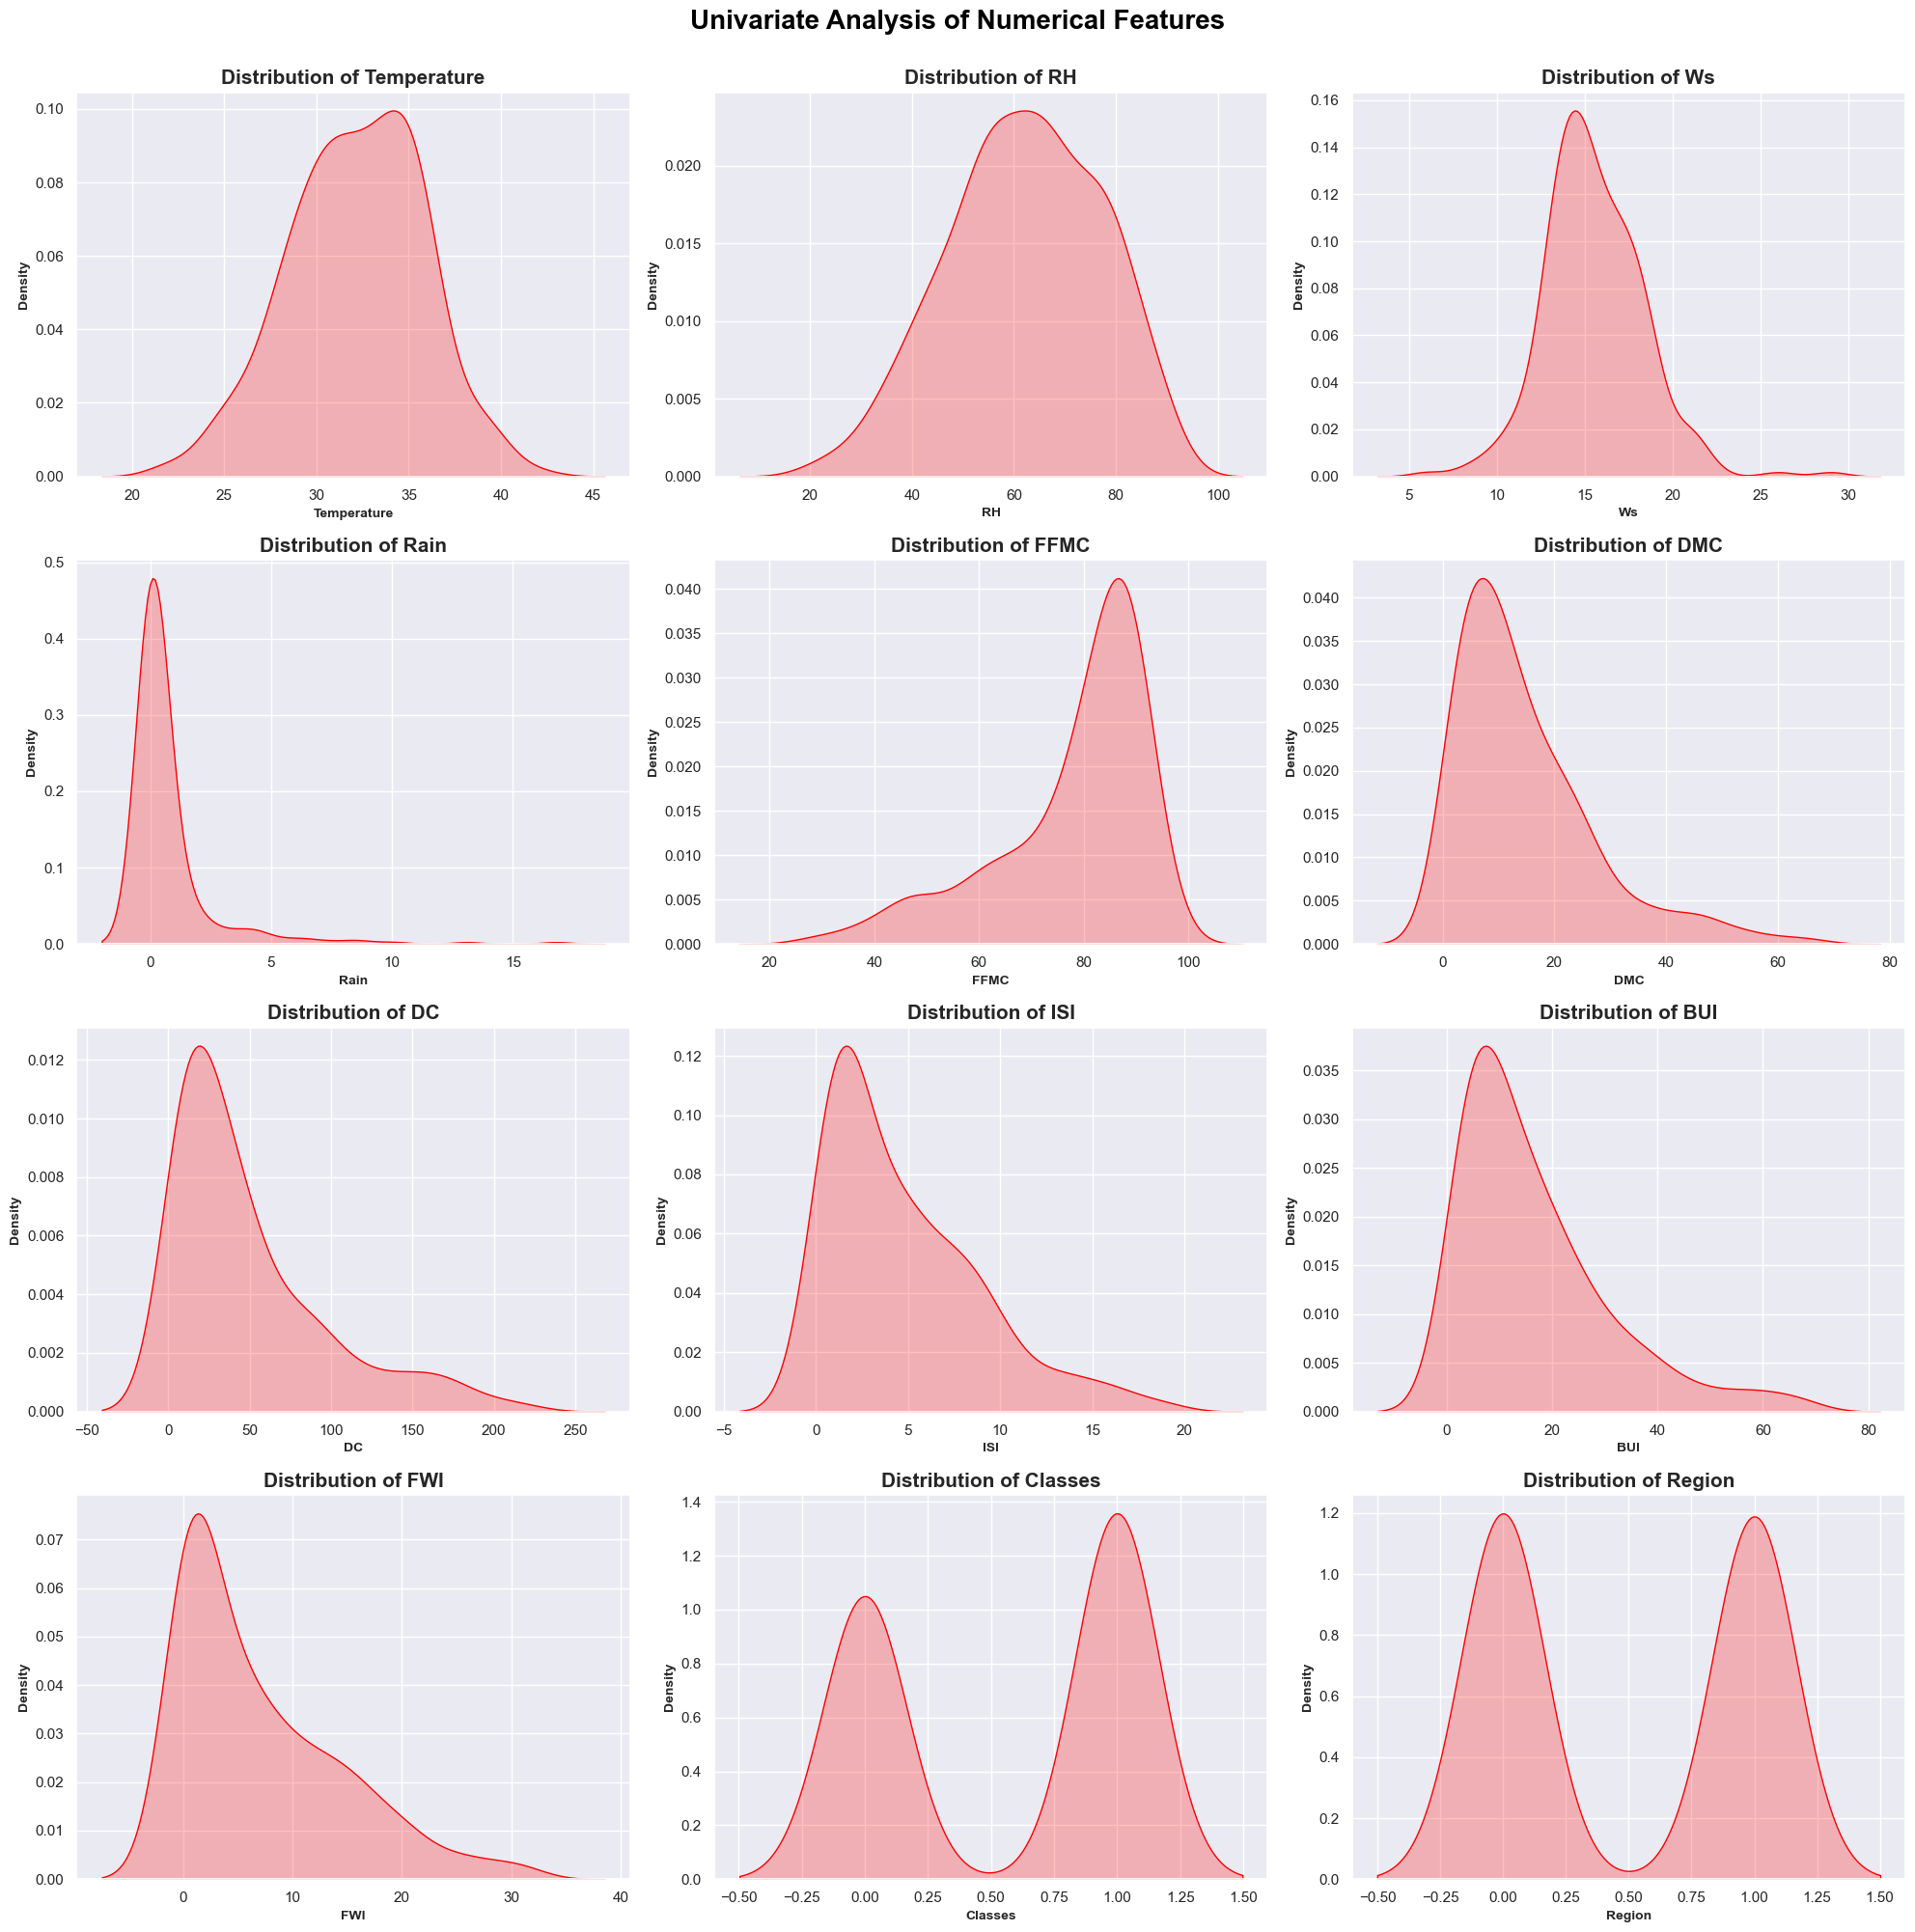

In [39]:
# Visualize all features using density plot.

plt.figure(figsize = (20,20))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize = 20, fontweight = 'bold', alpha = 1, y = 1)
sns.set(font_scale = 1)

for idx, col in enumerate(df_copy.columns):
    plt.subplot(4,3,idx+1)
    sns.kdeplot(x = col, data = df_copy, shade = True, color = 'red')
    plt.xlabel(col, fontsize = 10, fontweight = 'bold')
    plt.ylabel('Density', fontsize = 10, fontweight = 'bold')
    plt.title(f'Distribution of {col}', fontsize = 15, fontweight = 'bold')

plt.tight_layout()
plt.show()    

## Insights:

1. Temperature - Seems the data to be normally distributed. Most of the data points in this dataset are ranging between 30 - 35 deg C which denotes that the forest temperature will be mostly around this range.

2. Relative Humidity (RH) - Data is normally distributed and the humidity in the forest is mostly ranging between 60 - 70.
3. Wind Speed (Ws) - Data looks to be normally distributed and the speed of the wind seems to be mostly between 12 - 15 km/hr.
4. Rain - Data looks to be right skewed. To obtain a normal dist, square root/ cube root/ log transformations can be applied for this feature.
5. FFMC - Data looks to be a bit left skewed (not completely). To obtain a normal dist, transformation techniques like square/cube/exp can be applied.
6. DMC,DC - Data looks to be a bit right skewed.
7. ISI - Looks to be approximately normally distributed where the values are mostly in the range 1 - 4.
8. BUI - Looks to be normally distributed where the values are mostly between 8 - 12.
9. FWI - Looks to be normally distributed where the values are mostly between 0 - 5.
10. Classes, Regions - Categorical Feature where we have almost equal 1s and 0s. This is an example of multimodal KDE plot.

<Axes: ylabel='Classes'>

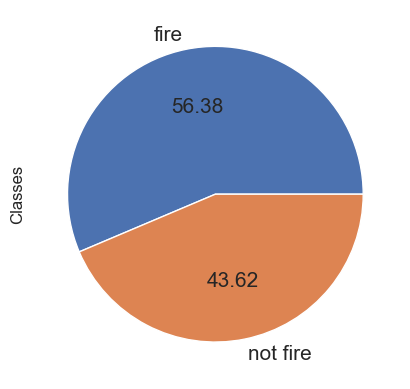

In [40]:
# Visualize the Classes data using pie-chart.

df['Classes'].value_counts(normalize = True).plot(kind = 'pie', autopct = '%0.2f', shadow = False, fontsize = 15)

## Insights:

56.38% of data we have in this dataset is having category as 'fire' and rest all data are with 'not fire'.

<Axes: >

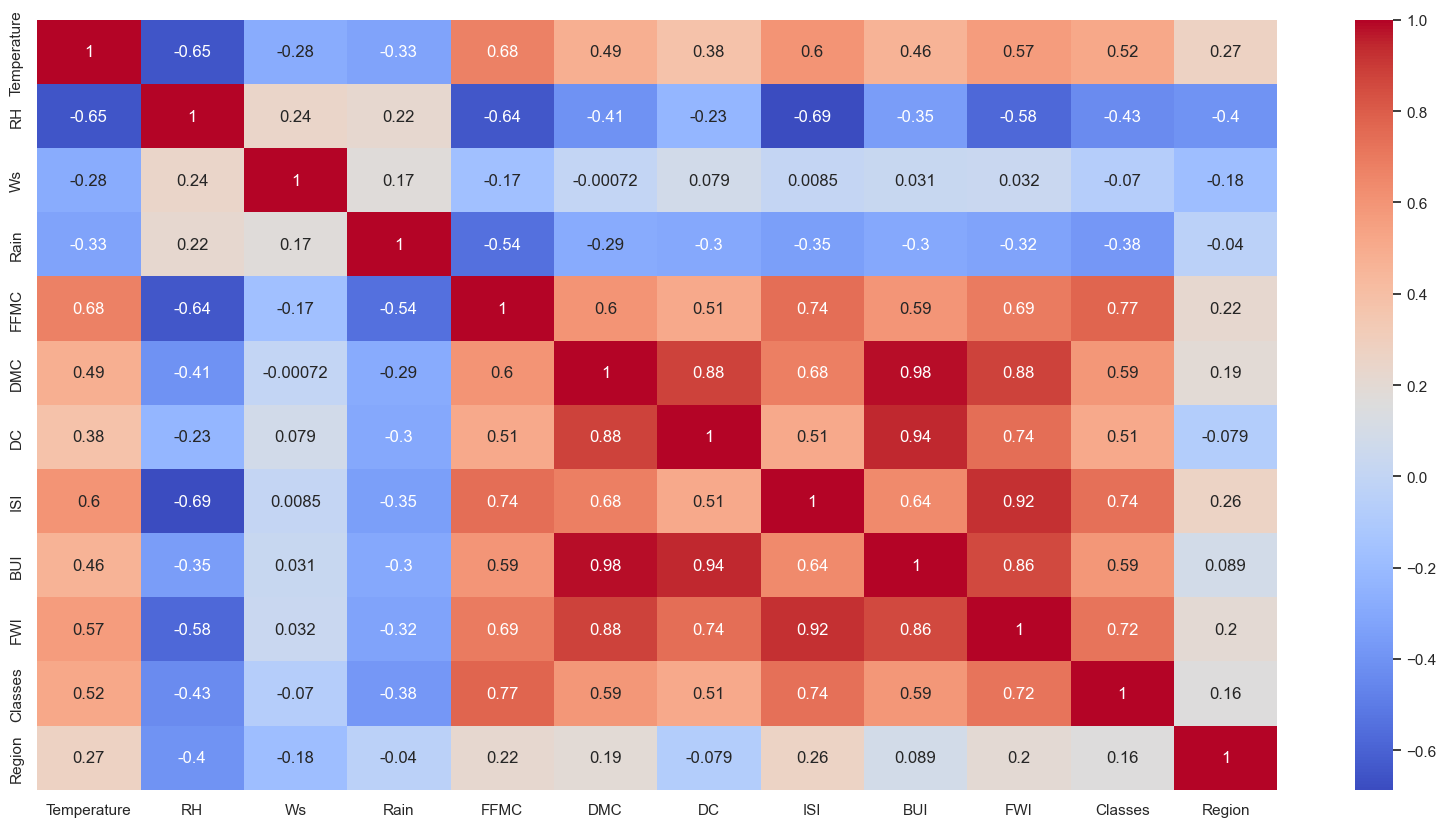

In [41]:
# Identify correlation between independent & dependent variable.

plt.figure(figsize = (20,10))
sns.heatmap(df_copy.corr(),annot = True, cmap = 'coolwarm')

## Insights:

With respect to FWI, apart from RH & Rain which are negatively correlated, rest all features are positively correlated with the target (FWI).

In [42]:
# Let's visualize of there are any outliers in FWI.

fig = px.box(x = 'FWI', data_frame = df_copy)
fig.show()

## Insights:

Yes, there are few outliers observed when FWI >= 30.

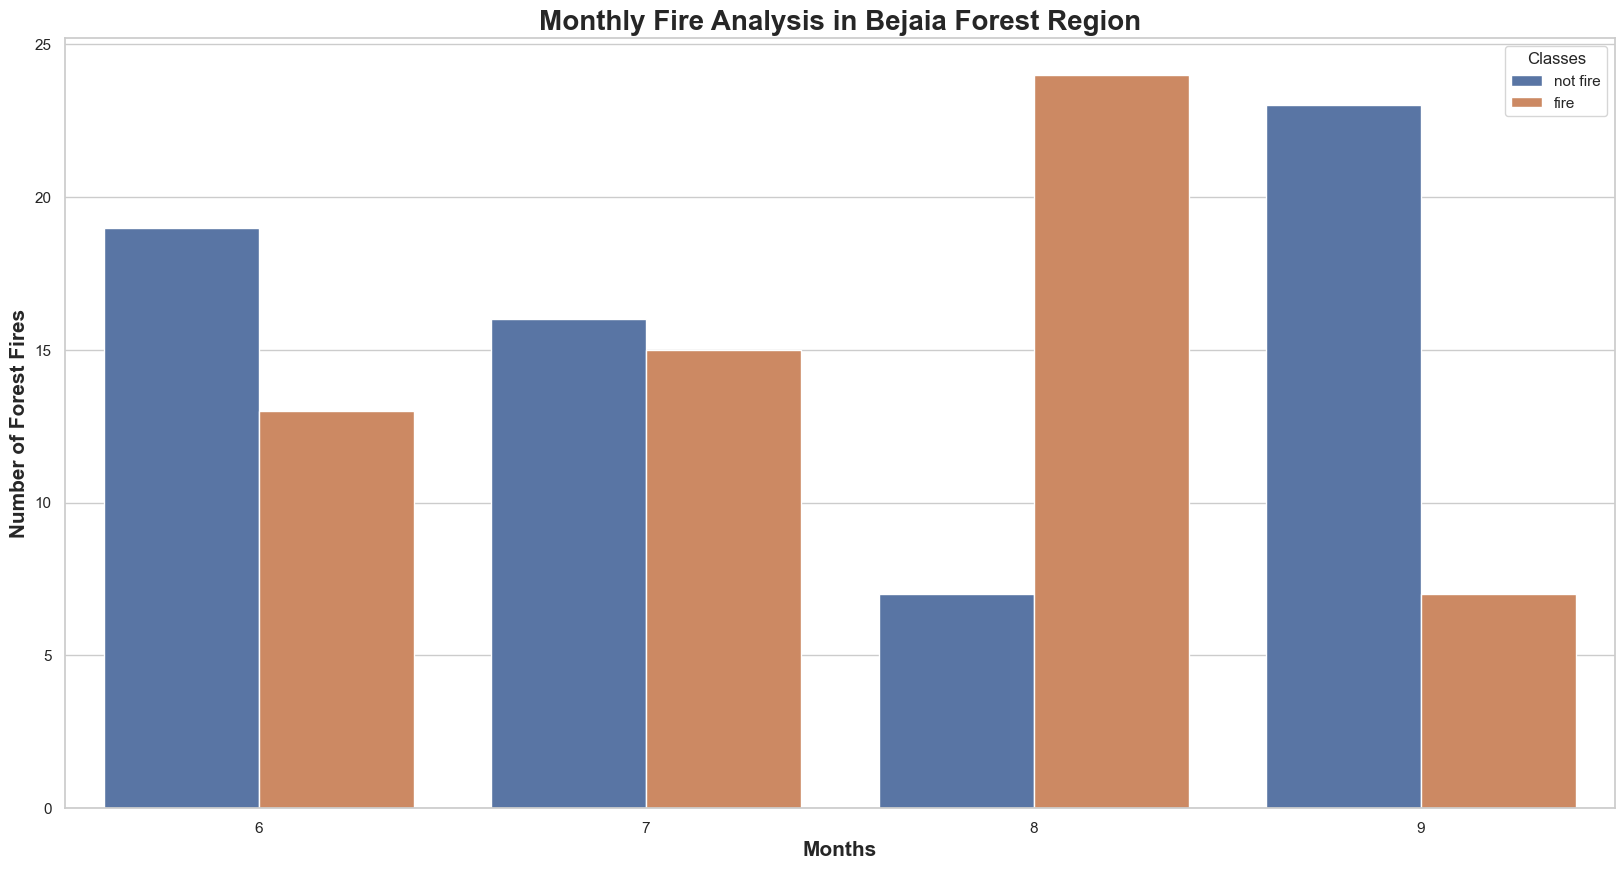

In [43]:
# Let's visualize the monthly fire Analysis in Bejaia region forest.

plt.figure(figsize = (20,10))
sns.set_style('whitegrid')
sns.countplot(x = 'month', hue = 'Classes', data = df.loc[:123])
plt.xlabel('Months', fontsize = 15, fontweight = 'bold')
plt.ylabel('Number of Forest Fires', fontsize = 15, fontweight = 'bold')
plt.title('Monthly Fire Analysis in Bejaia Forest Region', fontsize = 20, fontweight = 'bold')
plt.show()

## Insights:

Looks like Bejaia forest has witnessed highest forest fires during the month of August and least forest fire during the month of September.

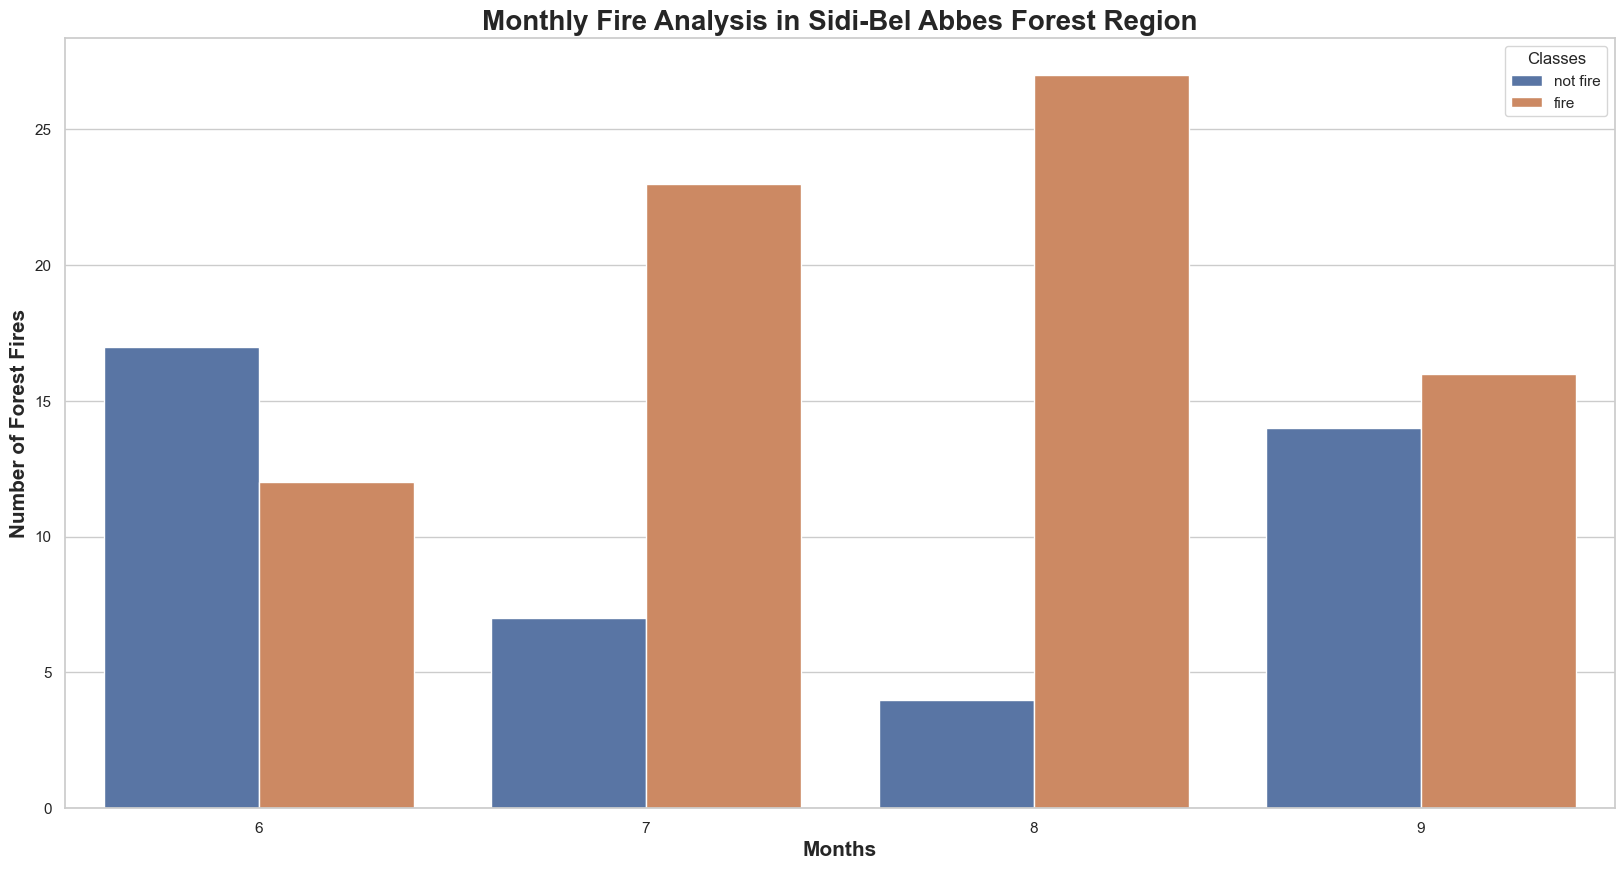

In [44]:
# Let's visualize the monthly fire Analysis in Sidi-Bel Abbes Forest Region.

plt.figure(figsize = (20,10))
sns.countplot(x = 'month', hue = 'Classes', data = df.loc[123:])
plt.xlabel('Months', fontsize = 15, fontweight = 'bold')
plt.ylabel('Number of Forest Fires', fontsize = 15, fontweight = 'bold')
plt.title('Monthly Fire Analysis in Sidi-Bel Abbes Forest Region', fontsize = 20, fontweight = 'bold')
plt.show()

## Insights:

Looks like Sidi-Bel Abbes forest region has also witnessed highest forest fires during the month of August and least one during September.

In [45]:
# Let's split the dataset into independent and dependent features.

X = df_copy.drop(['FWI'], axis = 1)
y = df_copy['FWI']

In [46]:
X.head()

Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  Classes  Region
0           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4        0       0
1           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9        0       0
2           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7        0       0
3           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7        0       0
4           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9        0       0

In [47]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [48]:
# Perform Train-Test Split.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [49]:
# Let's print the shapes of train & test dataset.
print(f'Shape of X-train: {X_train.shape}')
print(f'Shape of y-train: {y_train.shape}')
print(f'Shape of X-test: {X_test.shape}')
print(f'Shape of y-test: {y_test.shape}')

Shape of X-train: (194, 11)
Shape of y-train: (194,)
Shape of X-test: (49, 11)
Shape of y-test: (49,)


## Feature Selection

<Axes: >

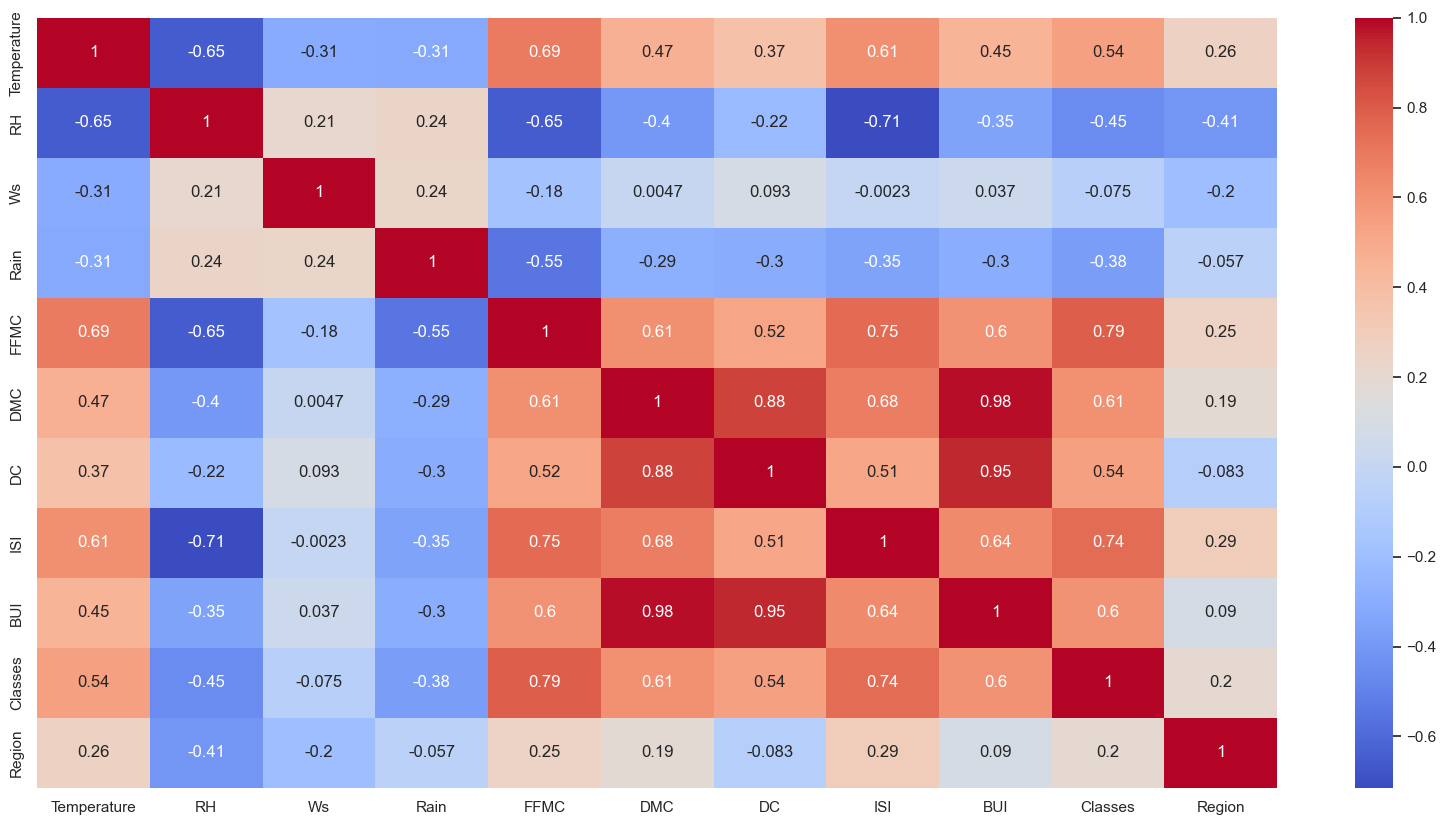

In [50]:
# Let's check the input features' correlation.

plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(), annot = True, cmap = 'coolwarm')

In [51]:
# Let's check the input features for the presence of multicollinearity.

def corr_func(dataset,threshold):
    corr_col = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                col_names = corr_matrix.columns[i]
                corr_col.add(col_names)
    return corr_col

In [52]:
# Calling correlation function.

corr_func(X_train,0.85)

# the threshold can vary depending our domain.

{'BUI', 'DC'}

## Insights:

BUI & DC seems to be highly correlated with DMC. So, keeping DMC, we can remove/drop BUI & DC features.

In [53]:
# Dropping BUI & DC features.

X_train = X_train.drop(['BUI','DC'],axis = 1)
X_test = X_test.drop(['BUI','DC'],axis = 1)

In [54]:
X_train.shape, X_test.shape

((194, 9), (49, 9))

## Feature Scaling or Standardization.

In [55]:
# As we witnessed some outliers in target feature (FWI), we will scaled the features using Standardization technique only.

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [56]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
X_train_scaled

array([[-0.87563202,  0.21321832,  1.28577038, ..., -0.79648833,
        -1.14434427, -1.01036297],
       [ 0.22209084, -1.65484925,  0.14504117, ...,  1.88757476,
         0.8738629 ,  0.98974332],
       [ 1.5942444 , -1.25454906, -0.99568804, ..., -0.19488798,
         0.8738629 ,  0.98974332],
       ...,
       [-1.97335488,  0.947102  ,  0.52528424, ..., -1.0972885 ,
        -1.14434427, -1.01036297],
       [ 0.49652155, -0.18708188,  0.14504117, ...,  0.56868169,
         0.8738629 ,  0.98974332],
       [-0.60120131,  1.0138187 ,  2.04625653, ..., -0.88904223,
        -1.14434427, -1.01036297]])

## Box Plot to understand the effect of Standardization.

Text(0.5, 1.0, 'Box Plot of Scaled Training Data')

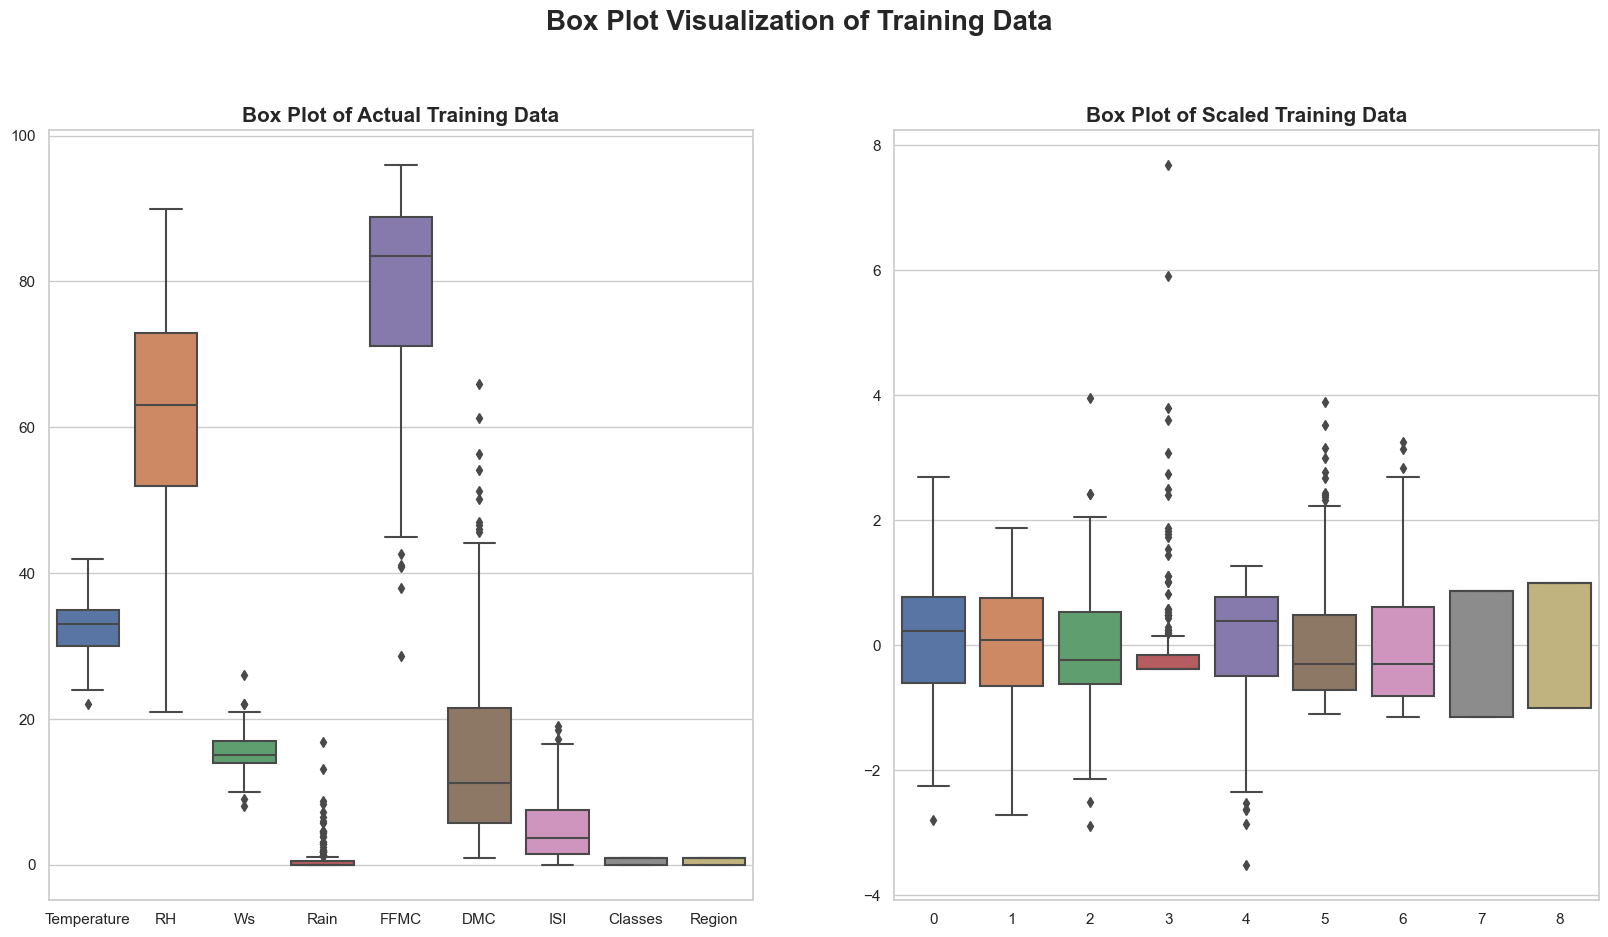

In [58]:
plt.figure(figsize = (20,10))
plt.suptitle('Box Plot Visualization of Training Data', fontsize = 20, fontweight = 'bold', alpha = 1, y = 1)
plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.title('Box Plot of Actual Training Data', fontsize = 15, fontweight = 'bold')
plt.subplot(1,2,2)
sns.boxplot(data = X_train_scaled)
plt.title('Box Plot of Scaled Training Data', fontsize = 15, fontweight = 'bold')

## Insights:

In scaled training data, we see that the median of all features are close to 0 and the ranges of datapoints in all features is almost same.

## Linear Regression Model Training

In [59]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled,y_train)

LinearRegression()

In [60]:
lin_pred = lin_reg.predict(X_test_scaled)

In [61]:
# To compare actual value & Predicted value.

linear_reg_compare = pd.DataFrame({
    'Actual Value Linear' : y_test,
    'Predicted Value Linear' : lin_pred
})

linear_reg_compare.head()

Actual Value Linear  Predicted Value Linear
24                   8.4                8.225191
6                    7.2                7.792022
152                  0.5               -0.278791
232                  3.8                4.352559
238                  6.5                6.667671

In [62]:
# Coefficient & Intercept.

print(f'Coefficient or Slope: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')

Coefficient or Slope: [-0.02653611 -0.1808412  -0.01415259 -0.0330928  -0.82478219  3.80917655
  4.89287492  0.39085739 -0.4004259 ]
Intercept: 7.420103092783505


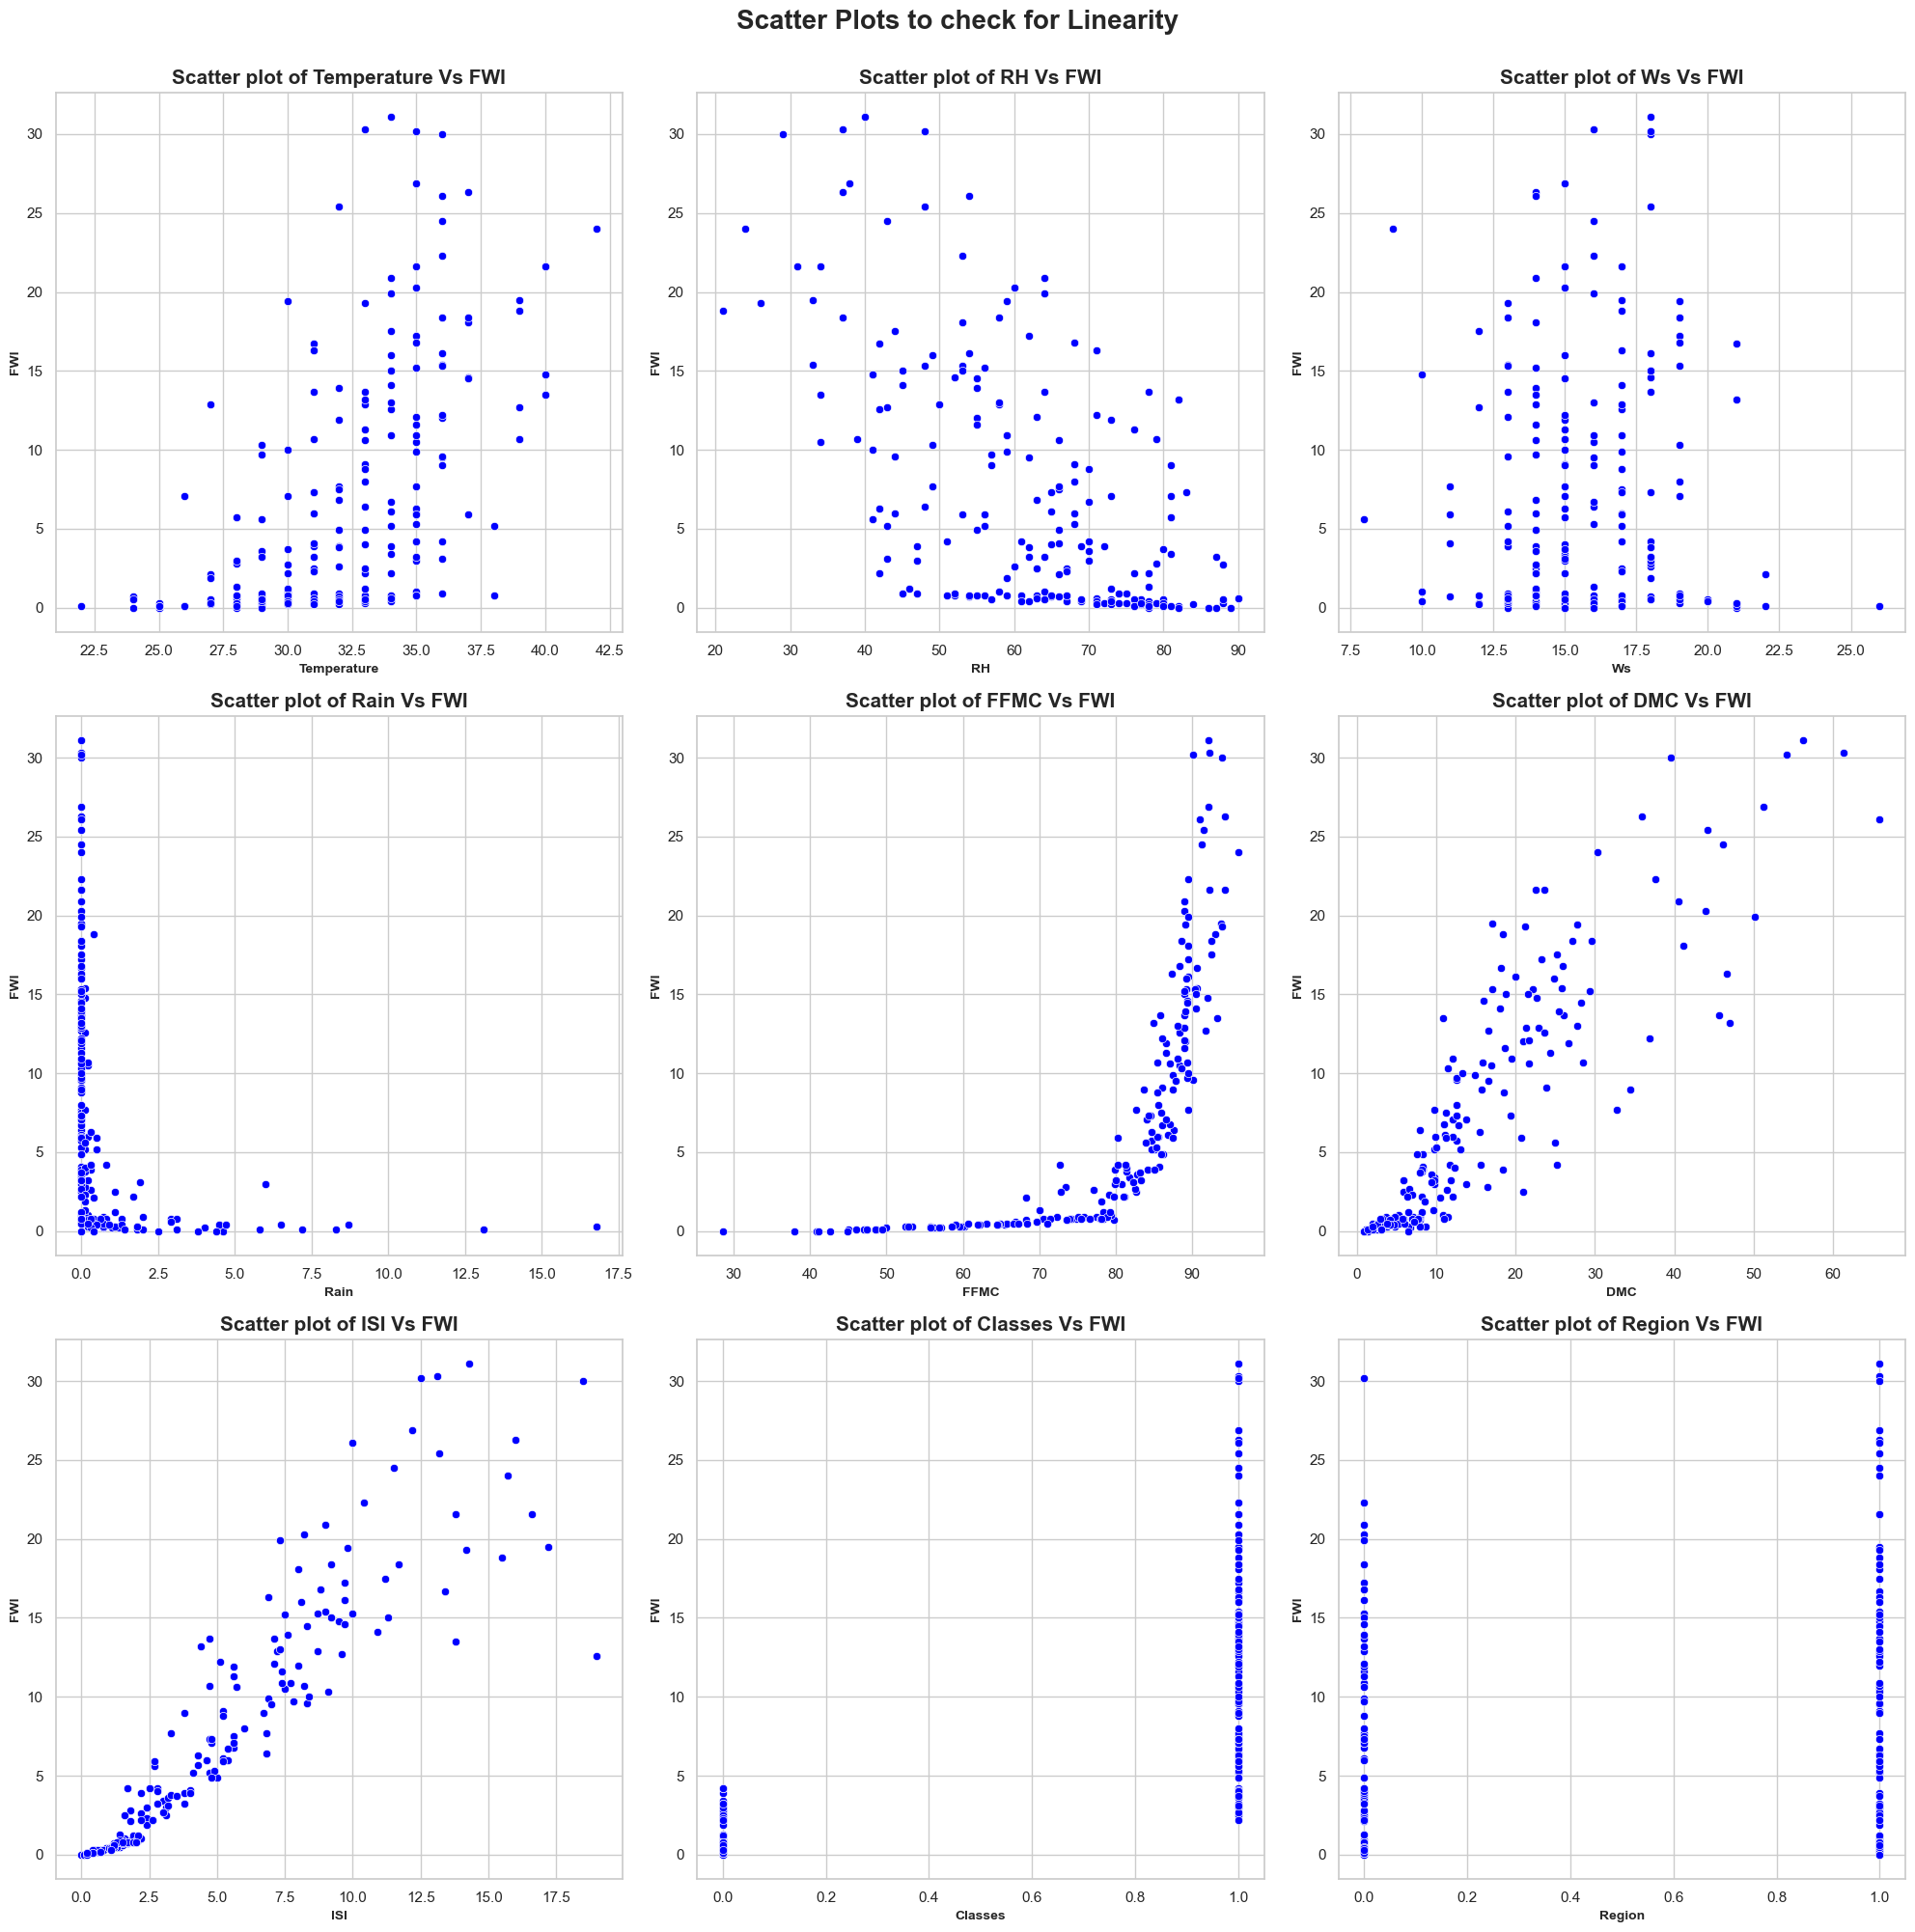

In [63]:
# Let's visualize the data points between X & Y.

X_train.columns, y_train.to_frame().columns

plt.figure(figsize = (20,20))
plt.suptitle('Scatter Plots to check for Linearity', fontsize = 20, fontweight = 'bold', alpha = 1, y = 1)
sns.set(font_scale = 1)
sns.set_style('whitegrid')

for idx,col in enumerate(X_train.columns):
    plt.subplot(3,3,idx+1)
    sns.scatterplot(x = X_train[col], y = y_train, color = 'blue')
    plt.title(f'Scatter plot of {col} Vs FWI', fontsize = 15, fontweight = 'bold')
    plt.xlabel(col, fontsize = 10, fontweight = 'bold')
    plt.ylabel('FWI', fontsize = 10, fontweight = 'bold')

plt.tight_layout()
plt.show()

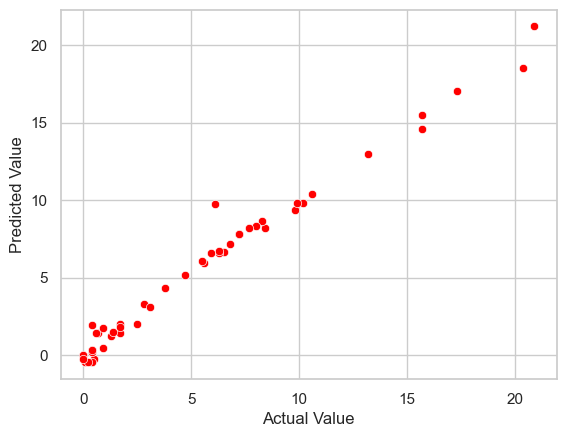

In [64]:
# Let's visualize the data between Actual Value and Predicted Value. (to check for linearity)

sns.scatterplot(x = y_test, y = lin_reg.predict(X_test_scaled), color = 'red')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

## Insights:

The actual data and predicted data are closely matching.

In [65]:
# To evaluate the performance of the model.

# Accuracy Score.
lin_score_train = lin_reg.score(X_train_scaled,y_train)
lin_score_test = lin_reg.score(X_test_scaled,y_test)

print(f'Accuracy Score of Training Data: {lin_score_train}')
print(f'Accuracy Score of Testing Data: {lin_score_test}')
print('---------------------------------------------------')

# R2 Score.
lin_r2_score_train = r2_score(y_train,lin_reg.predict(X_train_scaled))
lin_r2_score_test = r2_score(y_test,lin_reg.predict(X_test_scaled))

print(f'R2 Score of Training Data: {lin_r2_score_train}')
print(f'R2 Score of Testing Data: {lin_r2_score_test}')
print('---------------------------------------------------')

# Adjusted R2 Score.
lin_adj_score_train = 1 - (((1 - lin_r2_score_train) * (len(y_train) - 1)) / (len(y_train) - X_train.shape[1] - 1))
lin_adj_score_test = 1 - (((1 - lin_r2_score_test) * (len(y_test) - 1)) / (len(y_test) - X_test.shape[1] - 1))

print(f'Adjusted R2 Score of Training Data: {lin_adj_score_train}')
print(f'Adjusted R2 Score of Testing Data: {lin_adj_score_test}')
print('---------------------------------------------------')

# MAE.
lin_mae = mean_absolute_error(y_test,lin_reg.predict(X_test_scaled))
print(f'Mean Absolute Error: {lin_mae}')
print('---------------------------------------------------')

# MSE.
lin_mse = mean_squared_error(y_test, lin_reg.predict(X_test_scaled))
print(f'Mean Squared Error: {lin_mse}')
print('---------------------------------------------------')

# RMSE.
lin_rmse = np.sqrt(lin_mse)
print(f'Root Mean Squared Error: {lin_rmse}')
print('---------------------------------------------------')

Accuracy Score of Training Data: 0.9716397291602472
Accuracy Score of Testing Data: 0.9805895859259882
---------------------------------------------------
R2 Score of Training Data: 0.9716397291602472
R2 Score of Testing Data: 0.9805895859259882
---------------------------------------------------
Adjusted R2 Score of Training Data: 0.9702525419996071
Adjusted R2 Score of Testing Data: 0.9761102596012162
---------------------------------------------------
Mean Absolute Error: 0.5049978694165679
---------------------------------------------------
Mean Squared Error: 0.5882990110708675
---------------------------------------------------
Root Mean Squared Error: 0.7670065260940532
---------------------------------------------------


## Ridge Regression Model Training.

In [66]:
ridge_reg = Ridge()

ridge_reg.fit(X_train_scaled,y_train)

Ridge()

In [67]:
ridge_pred = ridge_reg.predict(X_test_scaled)

In [68]:
# To compare actual value & Predicted value.

ridge_reg_compare = pd.DataFrame({
    'Actual Value Ridge' : y_test,
    'Predicted Value Ridge' : ridge_pred
})

ridge_reg_compare.head()

Actual Value Ridge  Predicted Value Ridge
24                  8.4               8.239993
6                   7.2               7.810290
152                 0.5              -0.234499
232                 3.8               4.379750
238                 6.5               6.703826

In [69]:
# Coefficient & Intercept.
print(f'Coefficient or Slope : {ridge_reg.coef_}')
print(f'Intercept : {ridge_reg.intercept_}')

Coefficient or Slope : [-2.05596267e-02 -2.10537053e-01  3.49053966e-03 -3.25138965e-02
 -7.87549769e-01  3.79581263e+00  4.80287749e+00  4.17790706e-01
 -3.94439571e-01]
Intercept : 7.420103092783505


In [70]:
# To evaluate the performance of the model.

# Accuracy Score.
ridge_score_train = ridge_reg.score(X_train_scaled,y_train)
ridge_score_test = ridge_reg.score(X_test_scaled,y_test)

print(f'Accuracy Score of Training Data: {ridge_score_train}')
print(f'Accuracy Score of Testing Data: {ridge_score_test}')
print('---------------------------------------------------')

# R2 Score.
ridge_r2_score_train = r2_score(y_train,ridge_reg.predict(X_train_scaled))
ridge_r2_score_test = r2_score(y_test,ridge_reg.predict(X_test_scaled))

print(f'R2 Score of Training Data: {ridge_r2_score_train}')
print(f'R2 Score of Testing Data: {ridge_r2_score_test}')
print('---------------------------------------------------')

# Adjusted R2 Score.
ridge_adj_score_train = 1 - (((1 - ridge_r2_score_train) * (len(y_train) - 1)) / (len(y_train) - X_train.shape[1] - 1))
ridge_adj_score_test = 1 - (((1 - ridge_r2_score_test) * (len(y_test) - 1)) / (len(y_test) - X_test.shape[1] - 1))

print(f'Adjusted R2 Score of Training Data: {ridge_adj_score_train}')
print(f'Adjusted R2 Score of Testing Data: {ridge_adj_score_test}')
print('---------------------------------------------------')

# MAE.
ridge_mae = mean_absolute_error(y_test,ridge_reg.predict(X_test_scaled))
print(f'Mean Absolute Error: {ridge_mae}')
print('---------------------------------------------------')

# MSE.
ridge_mse = mean_squared_error(y_test, ridge_reg.predict(X_test_scaled))
print(f'Mean Squared Error: {ridge_mse}')
print('---------------------------------------------------')

# RMSE.
ridge_rmse = np.sqrt(ridge_mse)
print(f'Root Mean Squared Error: {ridge_rmse}')
print('---------------------------------------------------')

Accuracy Score of Training Data: 0.9715974837855171
Accuracy Score of Testing Data: 0.9801058063273599
---------------------------------------------------
R2 Score of Training Data: 0.9715974837855171
R2 Score of Testing Data: 0.9801058063273599
---------------------------------------------------
Adjusted R2 Score of Training Data: 0.9702082302750261
Adjusted R2 Score of Testing Data: 0.9755148385567506
---------------------------------------------------
Mean Absolute Error: 0.519204832584481
---------------------------------------------------
Mean Squared Error: 0.6029616070548663
---------------------------------------------------
Root Mean Squared Error: 0.776506025124639
---------------------------------------------------


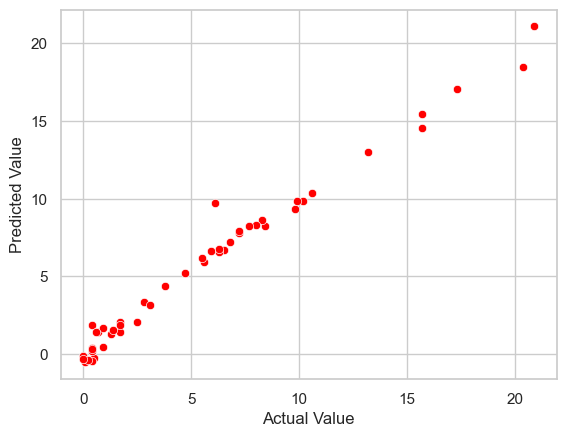

In [71]:
# Let's visualize the data between Actual Value and Predicted Value.

sns.scatterplot(x = y_test, y = ridge_reg.predict(X_test_scaled), color = 'red')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

## Lasso Regression Model Training.

In [72]:
lasso_reg = Lasso()
lasso_reg.fit(X_train_scaled,y_train)

Lasso()

In [73]:
lasso_pred = lasso_reg.predict(X_test_scaled)

In [74]:
# Compare Actual & Predicted Values.

lasso_reg_compare = pd.DataFrame({
    'Actual Value Lasso' : y_test,
    'Predicted Value Lasso' : lasso_reg.predict(X_test_scaled)
})
lasso_reg_compare.head()

Actual Value Lasso  Predicted Value Lasso
24                  8.4               7.889091
6                   7.2               7.518294
152                 0.5               1.056838
232                 3.8               5.595212
238                 6.5               7.196012

In [75]:
# Coefficient & Intercept.

print(f'Coefficient or Slope : {lasso_reg.coef_}')
print(f'Intercept : {lasso_reg.intercept_}')

Coefficient or Slope : [ 0.         -0.          0.         -0.          0.          3.11343121
  4.04219354  0.         -0.        ]
Intercept : 7.420103092783505


## Insights:

DMC & ISI features are the only features considered for this training. Rest all features' slopes are reduced to zero.

In [76]:
# To evaluate the performance of the model.

# Accuracy Score.
lasso_score_train = lasso_reg.score(X_train_scaled,y_train)
lasso_score_test = lasso_reg.score(X_test_scaled,y_test)

print(f'Accuracy Score of Training Data: {lasso_score_train}')
print(f'Accuracy Score of Testing Data: {lasso_score_test}')
print('---------------------------------------------------')

# R2 Score.
lasso_r2_score_train = r2_score(y_train,lasso_reg.predict(X_train_scaled))
lasso_r2_score_test = r2_score(y_test,lasso_reg.predict(X_test_scaled))

print(f'R2 Score of Training Data: {lasso_r2_score_train}')
print(f'R2 Score of Testing Data: {lasso_r2_score_test}')
print('---------------------------------------------------')

# Adjusted R2 Score.
lasso_adj_score_train = 1 - (((1 - lasso_r2_score_train) * (len(y_train) - 1)) / (len(y_train) - X_train.shape[1] - 1))
lasso_adj_score_test = 1 - (((1 - lasso_r2_score_test) * (len(y_test) - 1)) / (len(y_test) - X_test.shape[1] - 1))

print(f'Adjusted R2 Score of Training Data: {lasso_adj_score_train}')
print(f'Adjusted R2 Score of Testing Data: {lasso_adj_score_test}')
print('---------------------------------------------------')

# MAE.
lasso_mae = mean_absolute_error(y_test,lasso_reg.predict(X_test_scaled))
print(f'Mean Absolute Error: {lasso_mae}')
print('---------------------------------------------------')

# MSE.
lasso_mse = mean_squared_error(y_test, lasso_reg.predict(X_test_scaled))
print(f'Mean Squared Error: {lasso_mse}')
print('---------------------------------------------------')

# RMSE.
lasso_rmse = np.sqrt(lasso_mse)
print(f'Root Mean Squared Error: {lasso_rmse}')
print('---------------------------------------------------')

Accuracy Score of Training Data: 0.9466661920739026
Accuracy Score of Testing Data: 0.9430507350726564
---------------------------------------------------
R2 Score of Training Data: 0.9466661920739026
R2 Score of Testing Data: 0.9430507350726564
---------------------------------------------------
Adjusted R2 Score of Training Data: 0.9440574732079522
Adjusted R2 Score of Testing Data: 0.9299085970125002
---------------------------------------------------
Mean Absolute Error: 1.0093958923873405
---------------------------------------------------
Mean Squared Error: 1.7260423250231411
---------------------------------------------------
Root Mean Squared Error: 1.3137893000870198
---------------------------------------------------


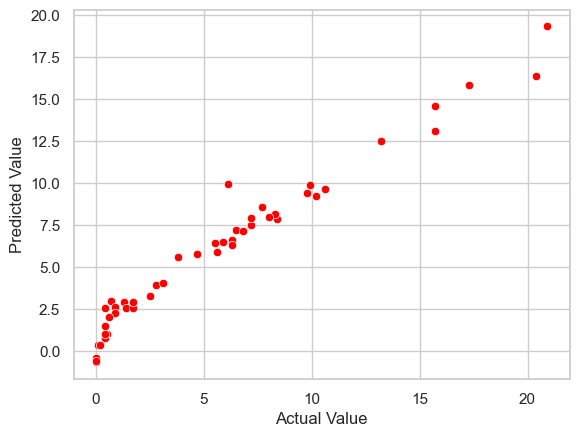

In [77]:
# Let's visualize the data between Actual Value and Predicted Value.

sns.scatterplot(x = y_test, y = lasso_reg.predict(X_test_scaled), color = 'red')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

## Elastic Net Regression Model Training

In [78]:
elastic_reg = ElasticNet()
elastic_reg.fit(X_train_scaled,y_train)

ElasticNet()

In [79]:
elastic_pred = elastic_reg.predict(X_test_scaled)

In [80]:
# To compare Actual & Predicted Values.

elastic_reg_compare = pd.DataFrame({
    'Actual Value Elastic' : y_test,
    'Predicted Value Elastic' : elastic_reg.predict(X_test_scaled)
})

elastic_reg_compare.head()

Actual Value Elastic  Predicted Value Elastic
24                    8.4                 8.518108
6                     7.2                 8.550110
152                   0.5                 1.613982
232                   3.8                 5.761488
238                   6.5                 8.074358

In [81]:
# Coefficient & Intercept.

print(f'Coefficient or Slope : {elastic_reg.coef_}')
print(f'Intercept : {elastic_reg.intercept_}')

Coefficient or Slope : [ 0.16932034 -0.47589083  0.         -0.          0.39758893  2.46069699
  2.40623714  0.85577059  0.        ]
Intercept : 7.420103092783506


## Insights:

The slopes of Ws, Rain & Region are 0 which denotes that these features are eliminated.

In [82]:
# To evaluate the performance of the model.

# Accuracy Score.
elastic_score_train = elastic_reg.score(X_train_scaled,y_train)
elastic_score_test = elastic_reg.score(X_test_scaled,y_test)

print(f'Accuracy Score of Training Data: {elastic_score_train}')
print(f'Accuracy Score of Testing Data: {elastic_score_test}')
print('---------------------------------------------------')

# R2 Score.
elastic_r2_score_train = r2_score(y_train,elastic_reg.predict(X_train_scaled))
elastic_r2_score_test = r2_score(y_test,elastic_reg.predict(X_test_scaled))

print(f'R2 Score of Training Data: {elastic_r2_score_train}')
print(f'R2 Score of Testing Data: {elastic_r2_score_test}')
print('---------------------------------------------------')

# Adjusted R2 Score.
elastic_adj_score_train = 1 - (((1 - elastic_r2_score_train) * (len(y_train) - 1)) / (len(y_train) - X_train.shape[1] - 1))
elastic_adj_score_test = 1 - (((1 - elastic_r2_score_test) * (len(y_test) - 1)) / (len(y_test) - X_test.shape[1] - 1))

print(f'Adjusted R2 Score of Training Data: {elastic_adj_score_train}')
print(f'Adjusted R2 Score of Testing Data: {elastic_adj_score_test}')
print('---------------------------------------------------')

# MAE.
elastic_mae = mean_absolute_error(y_test,elastic_reg.predict(X_test_scaled))
print(f'Mean Absolute Error: {elastic_mae}')
print('---------------------------------------------------')

# MSE.
elastic_mse = mean_squared_error(y_test, elastic_reg.predict(X_test_scaled))
print(f'Mean Squared Error: {elastic_mse}')
print('---------------------------------------------------')

# RMSE.
elastic_rmse = np.sqrt(elastic_mse)
print(f'Root Mean Squared Error: {elastic_rmse}')
print('---------------------------------------------------')

Accuracy Score of Training Data: 0.8900628257523168
Accuracy Score of Testing Data: 0.8676961352267807
---------------------------------------------------
R2 Score of Training Data: 0.8900628257523168
R2 Score of Testing Data: 0.8676961352267807
---------------------------------------------------
Adjusted R2 Score of Training Data: 0.8846854639684627
Adjusted R2 Score of Testing Data: 0.8371644741252685
---------------------------------------------------
Mean Absolute Error: 1.6834416340136709
---------------------------------------------------
Mean Squared Error: 4.009921298441002
---------------------------------------------------
Root Mean Squared Error: 2.0024787885121285
---------------------------------------------------


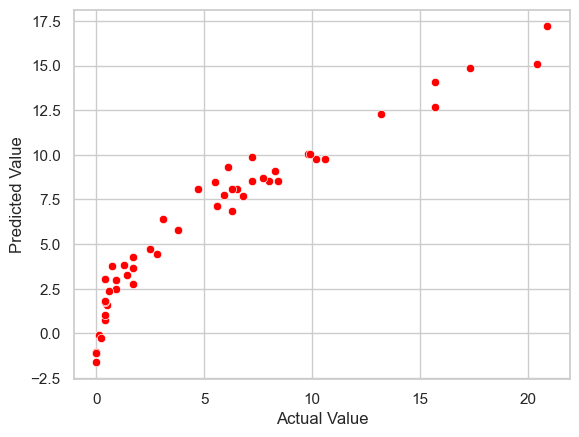

In [83]:
# Let's visualize the data between Actual Value and Predicted Value.

sns.scatterplot(x = y_test, y = elastic_reg.predict(X_test_scaled), color = 'red')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

In [84]:
# To compare Actual & Predicted Values of all 4 models.

final_compare = pd.concat([linear_reg_compare,ridge_reg_compare,lasso_reg_compare,elastic_reg_compare],axis = 1).reset_index(drop=True)
final_compare.head()

Actual Value Linear  Predicted Value Linear  Actual Value Ridge  \
0                  8.4                8.225191                 8.4   
1                  7.2                7.792022                 7.2   
2                  0.5               -0.278791                 0.5   
3                  3.8                4.352559                 3.8   
4                  6.5                6.667671                 6.5   

   Predicted Value Ridge  Actual Value Lasso  Predicted Value Lasso  \
0               8.239993                 8.4               7.889091   
1               7.810290                 7.2               7.518294   
2              -0.234499                 0.5               1.056838   
3               4.379750                 3.8               5.595212   
4               6.703826                 6.5               7.196012   

   Actual Value Elastic  Predicted Value Elastic  
0                   8.4                 8.518108  
1                   7.2                 8.550110  
2                   0.5                 1.613982  
3                   3.8                 5.761488  
4                   6.5                 8.074358

## Lasso Regression with Cross Validation

In [85]:
# n_alphas - denotes the no. of alphas(lambdas) that will be used for each fold(iteration).
# Default n_alphas = 100 which denotes 100 lambdas will be applied which in turn calculates 100 accuracy scores
# and 100 mse_path_ for every fold.
lassocv = LassoCV(cv=10)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=10)

In [86]:
lasso_pred = lassocv.predict(X_test_scaled)

In [87]:
lassocv.alpha_

0.025127375592682532

## Insights:
From cv, the optimum lambda for accurate prediction without overfitting is observed as 0.025 

In [88]:
# To list out 100 lambdas (n_alphas) that were tried during cross validation.

lassocv.alphas_

array([7.1563667 , 6.67405153, 6.2242428 , 5.80474966, 5.41352896,
       5.04867523, 4.70841142, 4.39108025, 4.09513613, 3.81913766,
       3.56174057, 3.32169117, 3.09782031, 2.88903759, 2.69432612,
       2.51273756, 2.34338746, 2.18545099, 2.0381589 , 1.90079382,
       1.77268667, 1.65321353, 1.54179247, 1.43788081, 1.34097246,
       1.2505954 , 1.16630946, 1.08770411, 1.01439649, 0.94602956,
       0.88227033, 0.82280827, 0.76735374, 0.71563667, 0.66740515,
       0.62242428, 0.58047497, 0.5413529 , 0.50486752, 0.47084114,
       0.43910802, 0.40951361, 0.38191377, 0.35617406, 0.33216912,
       0.30978203, 0.28890376, 0.26943261, 0.25127376, 0.23433875,
       0.2185451 , 0.20381589, 0.19007938, 0.17726867, 0.16532135,
       0.15417925, 0.14378808, 0.13409725, 0.12505954, 0.11663095,
       0.10877041, 0.10143965, 0.09460296, 0.08822703, 0.08228083,
       0.07673537, 0.07156367, 0.06674052, 0.06224243, 0.0580475 ,
       0.05413529, 0.05048675, 0.04708411, 0.0439108 , 0.04095

In [89]:
# To list out MSE for all 5 folds (each fold will have 100 MSE as we have 100 alphas).
# So, we will have 1000 MSE entries (100 * 10 folds)

lassocv.mse_path_

array([[ 73.40933565,  60.04923663,  58.47967373,  71.63934912,
         49.85992093,  48.31988274, 102.39020492,  57.81000384,
         47.24652341,  37.9795166 ],
       [ 67.4784277 ,  53.8807373 ,  52.90960936,  65.19633336,
         43.25477995,  41.91183559, 100.16056767,  51.5697747 ,
         42.55062639,  33.65169235],
       [ 60.52614223,  48.45332098,  46.54411534,  59.1630836 ,
         37.41153626,  36.39519694,  90.58110017,  46.12371663,
         38.44521595,  29.88513531],
       [ 54.25412121,  42.77479081,  40.98212582,  53.83527071,
         32.3081558 ,  31.61409969,  82.14072805,  40.5972856 ,
         33.97956349,  25.70624557],
       [ 47.5660119 ,  37.56811625,  36.12078507,  47.71817556,
         27.97881901,  27.47166891,  73.68836123,  35.31074383,
         29.81596504,  21.88215821],
       [ 41.73182151,  33.0260155 ,  31.87033378,  42.06698909,
         24.31526709,  23.88355101,  65.36135107,  30.7316704 ,
         26.18143746,  18.6015688 ],
       [ 3

In [90]:
# Coefficient & Intercept.
print(f'Coefficient or Slope : {lassocv.coef_}')
print(f'Intercept : {lassocv.intercept_}')

Coefficient or Slope : [-0.         -0.06363818  0.          0.         -0.60633509  3.76036866
  4.89346979  0.26622289 -0.35166173]
Intercept : 7.420103092783505


## Insights:

Temperature, Ws, Rain features are regularized with 0 slope which denotes that these features are eliminated.

In [91]:
# To compare Actual & Predicted values.

lassocv_reg_compare = pd.DataFrame({
    'Actual Values Lassocv' : y_test,
    'Predicted Values Lassocv' : lassocv.predict(X_test_scaled)
})

lassocv_reg_compare.head()

Actual Values Lassocv  Predicted Values Lassocv
24                     8.4                  8.196867
6                      7.2                  7.728743
152                    0.5                 -0.291920
232                    3.8                  4.511663
238                    6.5                  6.704978

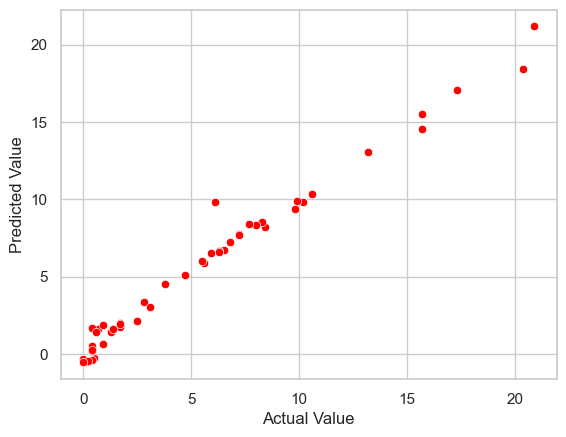

In [92]:
# Let's visualize the data between Actual Value and Predicted Value.

sns.scatterplot(x = y_test, y = lassocv.predict(X_test_scaled), color = 'red')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

In [93]:
# Let's calculate MAE & R2 score.

mae_lassocv = mean_absolute_error(y_test,lassocv.predict(X_test_scaled))
r2_score_lassocv = r2_score(y_test,lassocv.predict(X_test_scaled))

print(f'Mean Absolute Error of Test Data : {mae_lassocv}')
print(f'R2 Score of Test Data : {r2_score_lassocv}')

Mean Absolute Error of Test Data : 0.5247281651642639
R2 Score of Test Data : 0.9798107002016329


## Ridge Regression Cross Validation

In [94]:
# By default uses Leave one out cross validation for each fold.
# alpha values are 0.1,1.0,1.0.
ridgecv = RidgeCV(cv = 5)
ridgecv.fit(X_train_scaled,y_train)

RidgeCV(cv=5)

In [95]:
ridgecv_pred = ridgecv.predict(X_test_scaled)

In [96]:
# Find the optimal lambda that was used for training.
ridgecv.alpha_

10.0

## Insights:

It is observed that out of three lambda values, lambda = 10 has been used by the model for accurate prediction.

In [97]:
print(f'Coefficient or Slope: {ridgecv.coef_}')
print(f'Intercept : {ridgecv.intercept_}')

Coefficient or Slope: [ 0.03595983 -0.39323812  0.12616544 -0.0284016  -0.49780933  3.6565826
  4.17982605  0.59428575 -0.34322992]
Intercept : 7.420103092783506


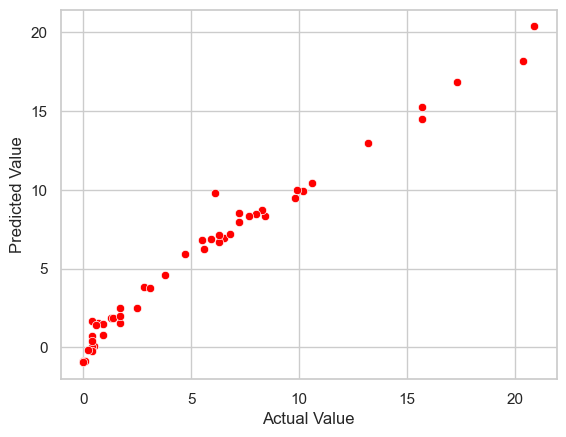

In [98]:
# Let's visualize the data between Actual Value and Predicted Value.

sns.scatterplot(x = y_test, y = ridgecv.predict(X_test_scaled), color = 'red')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

In [99]:
# Let's calculate MAE & R2 score.

mae_ridgecv = mean_absolute_error(y_test,ridgecv.predict(X_test_scaled))
r2_score_ridgecv = r2_score(y_test,ridgecv.predict(X_test_scaled))

print(f'Mean Absolute Error of Test Data : {mae_ridgecv}')
print(f'R2 Score of Test Data : {r2_score_ridgecv}')

Mean Absolute Error of Test Data : 0.6869262008277159
R2 Score of Test Data : 0.9722193780965623


## ElasticNet Cross Validation

In [100]:
# In this, L1 ratio and L2 ratio will be 0.5 each.
# n_alphas = 100 and alphas can be any values.
elasticcv = ElasticNetCV(cv = 8)
elasticcv.fit(X_train_scaled,y_train)

ElasticNetCV(cv=8)

In [101]:
elasticcv_pred = elasticcv.predict(X_test_scaled)

In [102]:
# Optimum alpha value.
elasticcv.alpha_

0.02028792978617944

In [103]:
# Total no. of alphas.
len(elasticcv.alphas_)

100

In [104]:
# 800 MSE entries.
elasticcv.mse_path_

array([[ 67.77455124,  58.74162407,  85.99572088,  45.75984524,
         54.200359  , 101.50432116,  34.31854743,  46.96065577],
       [ 66.8771534 ,  57.51566736,  85.6008941 ,  44.537281  ,
         52.88775156, 101.50432116,  33.42288705,  45.76212723],
       [ 65.08768611,  55.93549566,  83.77491234,  43.19013107,
         51.40776044, 100.27497844,  32.48290511,  44.36084701],
       [ 63.2508453 ,  54.31478686,  81.5734467 ,  41.81270305,
         49.89031576,  97.95655732,  31.52084006,  42.92641294],
       [ 61.36997424,  52.65661466,  79.31569987,  40.3416476 ,
         48.33835208,  95.25185871,  30.4576724 ,  41.46187652],
       [ 59.03354002,  50.54508075,  76.81676911,  38.48355746,
         46.44250169,  92.19058828,  29.03070478,  39.77302338],
       [ 56.50256827,  48.25555043,  73.76244894,  36.58319288,
         44.3079616 ,  88.78950966,  27.62176508,  37.7146858 ],
       [ 53.99374454,  45.99213789,  70.70807676,  34.71339659,
         42.05424246,  85.2529741

In [105]:
# Coefficient & Intercept.

print(f'Coefficient or Slope : {elasticcv.coef_}')
print(f'Intercept : {elasticcv.intercept_}')

Coefficient or Slope : [-0.         -0.18318955  0.01113783 -0.         -0.65998676  3.76254506
  4.72716505  0.39165378 -0.37226372]
Intercept : 7.420103092783505


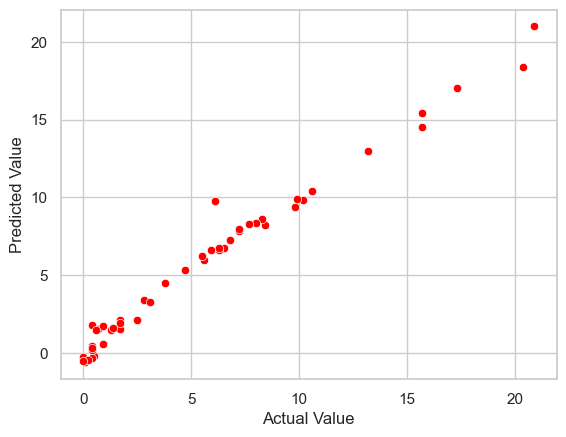

In [106]:
# Let's visualize the data between Actual Value and Predicted Value.

sns.scatterplot(x = y_test, y = elasticcv.predict(X_test_scaled), color = 'red')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

In [107]:
# Let's calculate MAE & R2 score.

mae_elasticcv = mean_absolute_error(y_test,elasticcv.predict(X_test_scaled))
r2_score_elasticcv = r2_score(y_test,elasticcv.predict(X_test_scaled))

print(f'Mean Absolute Error of Test Data : {mae_elasticcv}')
print(f'R2 Score of Test Data : {r2_score_elasticcv}')

Mean Absolute Error of Test Data : 0.5509714259317757
R2 Score of Test Data : 0.9789829967839578


In [108]:
# To convert the ridge regression model & Standard Scaler into pickle format.

pickle.dump(scaler,open('StandardScaler.pkl','wb'))         # to pickle standard scaler.
pickle.dump(ridge_reg, open('RidgeRegression.pkl','wb'))    # to pickle ridge regression as it has good accuracy comparatively.

In [ ]:
# Points to Note:
# 1. pd.read_csv(header = 1) - will make first row as header.
# 2. np.where() - can be very helpful to encode binary categories. However, map() can be used to encode 
#    incase of multi-class classification.
#    str.contains() - similar to like operator in SQL.

# 3. 